In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
ls

cifar_classification.ipynb
data-transfer-learning/
filename.csv
intuitions_on_convolutions.ipynb
london-bss-colab/
Untitled0.ipynb
W6-D5-C2-data-first-transformer/
W6-D5-C3-data-transformer-finetuning-challenge/
Your-first-Transformers.ipynb


In [4]:
data_path = 'london-bss-colab/data/'

In [5]:
data=pd.read_csv(data_path + 'tripcsvbame_6month.csv')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#data['usage-stats/'][301:306]

In [8]:
data['usage-stats/'][0]

' 351JourneyDataExtract02Jan2023-08Jan2023.csv'

In [9]:
data['usage-stats/']=data['usage-stats/'].apply(lambda x: x.strip())
data

,usage-stats/
0,351JourneyDataExtract02Jan2023-08Jan2023.csv
1,352JourneyDataExtract09Jan2023-15Jan2023.csv
2,353JourneyDataExtract16Jan2023-22Jan2023.csv
3,354JourneyDataExtract23Jan2023-29Jan2023.csv
4,355JourneyDataExtract30Jan2023-05Feb2023.csv
5,356JourneyDataExtract06Feb2023-12Feb2023.csv
6,357JourneyDataExtract13Feb2023-19Feb2023.csv
7,358JourneyDataExtract20Feb2023-26Feb2023.csv
8,359JourneyDataExtract27Feb2023-05Mar2023.csv
9,360JourneyDataExtract06Mar2023-12Mar2023.csv


In [10]:
data_2023=data
frames=[]
for x in data_2023.index:
  # print((data_path + data_2023['usage-stats/'][x]).replace(' ',''))
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))

result = pd.concat(frames)
result.columns

<ipython-input-10-e8764067b4ff>:5: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))
<ipython-input-10-e8764067b4ff>:5: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  frames.append(pd.read_csv(data_path + data_2023['usage-stats/'][x]))


Index(['Number', 'Start date', 'Start station number', 'Start station',
       'End date', 'End station number', 'End station', 'Bike number',
       'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')

In [11]:
dict_columns = {
    "Number": "Rental Id",
    "Total duration (ms)": "Duration",
    "Bike number" : "Bike Id",
    "Start station" : 'StartStation Name',
    'End station': 'EndStation Name',
    'End Date': 'End date',
    'Start Date': 'Start date'
}

In [12]:
result_general = result.rename(columns=dict_columns)
result_general['Duration'] = result_general['Duration']/1000
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59,200252,"Bow Church Station, Bow",2023-01-09 00:05,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59,960,"Hop Exchange, The Borough",2023-01-09 00:06,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58,300051,"Hibbert Street, Battersea",2023-01-09 00:03,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58,1201,"Bank of England Museum, Bank",2023-01-09 00:13,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
207955,131400576,2023-06-12 00:00,200184,"Erin Close, Walham Green",2023-06-12 00:22,300073,"Prince of Wales Drive, Battersea Park",57572,CLASSIC,21m 46s,1306.767
207956,131400577,2023-06-12 00:00,1071,"Tower Gardens , Tower",2023-06-12 00:46,995,"Little Argyll Street, West End",58990,CLASSIC,46m 7s,2767.721
207957,131400578,2023-06-12 00:00,3428,"Pancras Road, King's Cross",2023-06-12 00:16,3480,"Smith Square, Westminster",61140,PBSC_EBIKE,15m 31s,931.534
207958,131400579,2023-06-12 00:00,200239,"Old Montague Street, Whitechapel",2023-06-12 00:16,200252,"Bow Church Station, Bow",56849,CLASSIC,15m 43s,943.942


In [13]:
date_format = '%d/%m/%Y %H:%M:%S'
result_general['End date']=pd.to_datetime(result_general['End date'])
result_general['Start date']=pd.to_datetime(result_general['Start date'])
result_general

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
207955,131400576,2023-06-12 00:00:00,200184,"Erin Close, Walham Green",2023-06-12 00:22:00,300073,"Prince of Wales Drive, Battersea Park",57572,CLASSIC,21m 46s,1306.767
207956,131400577,2023-06-12 00:00:00,1071,"Tower Gardens , Tower",2023-06-12 00:46:00,995,"Little Argyll Street, West End",58990,CLASSIC,46m 7s,2767.721
207957,131400578,2023-06-12 00:00:00,3428,"Pancras Road, King's Cross",2023-06-12 00:16:00,3480,"Smith Square, Westminster",61140,PBSC_EBIKE,15m 31s,931.534
207958,131400579,2023-06-12 00:00:00,200239,"Old Montague Street, Whitechapel",2023-06-12 00:16:00,200252,"Bow Church Station, Bow",56849,CLASSIC,15m 43s,943.942


In [14]:
results_f = result_general[result_general['Duration']<3600]

In [15]:
results_f

,Rental Id,Start date,Start station number,StartStation Name,End date,End station number,EndStation Name,Bike Id,Bike model,Total duration,Duration
0,127804092,2023-01-08 23:59:00,200252,"Bow Church Station, Bow",2023-01-09 00:05:00,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406.323
1,127804093,2023-01-08 23:59:00,960,"Hop Exchange, The Borough",2023-01-09 00:06:00,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435.048
2,127804087,2023-01-08 23:58:00,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03:00,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309.267
3,127804088,2023-01-08 23:58:00,300051,"Hibbert Street, Battersea",2023-01-09 00:03:00,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309.019
4,127804089,2023-01-08 23:58:00,1201,"Bank of England Museum, Bank",2023-01-09 00:13:00,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901.787
...,...,...,...,...,...,...,...,...,...,...,...
207955,131400576,2023-06-12 00:00:00,200184,"Erin Close, Walham Green",2023-06-12 00:22:00,300073,"Prince of Wales Drive, Battersea Park",57572,CLASSIC,21m 46s,1306.767
207956,131400577,2023-06-12 00:00:00,1071,"Tower Gardens , Tower",2023-06-12 00:46:00,995,"Little Argyll Street, West End",58990,CLASSIC,46m 7s,2767.721
207957,131400578,2023-06-12 00:00:00,3428,"Pancras Road, King's Cross",2023-06-12 00:16:00,3480,"Smith Square, Westminster",61140,PBSC_EBIKE,15m 31s,931.534
207958,131400579,2023-06-12 00:00:00,200239,"Old Montague Street, Whitechapel",2023-06-12 00:16:00,200252,"Bow Church Station, Bow",56849,CLASSIC,15m 43s,943.942


In [16]:
len(result_general)

3784861

In [17]:
len(results_f)

3685263

In [18]:
result=results_f.dropna()
new_result=result.set_index('Start date').groupby([pd.Grouper(freq='h'), 'StartStation Name', 'EndStation Name']).count()
new_result

Rental Id  \
Start date          StartStation Name                  EndStation Name                                
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                      1   
                                                       Devons Road, Bow                           1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                      2   
                                                       Thorndike Close, West Chelsea              1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green               2   
...                                                                                             ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                    1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                     1   
                    Westminster University, Marylebone Beaumont Street, Marylebone                1   
                                                       Mallory Street, Marylebone                 1   
2023-06-19 00:00:00 Exhibition Road, Knightsbridge     Grant Road East, Clapham Junction          1   

                                                                                          Start station number  \
Start date          StartStation Name                  EndStation Name                                           
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                                 1   
                                                       Devons Road, Bow                                      1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                                 2   
                                                       Thorndike Close, West Chelsea                         1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green                          2   
...                                                                                                        ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                               1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                                1   
                    Westminster University, Marylebone Beaumont Street, Marylebone                           1   
                                                       Mallory Street, Marylebone                            1   
2023-06-19 00:00:00 Exhibition Road, Knightsbridge     Grant Road East, Clapham Junction                     1   

                                                                                          End date  \
Start date          StartStation Name                  EndStation Name                               
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                     1   
                                                       Devons Road, Bow                          1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                     2   
                                                       Thorndike Close, West Chelsea             1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green              2   
...                                                                                            ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                   1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                    1   
                    Westminster University, Marylebone Beaumont Street, Marylebone               1   
                                                       Mallory Street, Marylebone                1   
2023-06-19 00:00:00 Exhibition Road, Knight

In [19]:
new_result.columns

Index(['Rental Id', 'Start station number', 'End date', 'End station number',
       'Bike Id', 'Bike model', 'Total duration', 'Duration'],
      dtype='object')

In [20]:
new_result['No of trips']=new_result['Duration']

In [21]:
new_result

Rental Id  \
Start date          StartStation Name                  EndStation Name                                
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                      1   
                                                       Devons Road, Bow                           1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                      2   
                                                       Thorndike Close, West Chelsea              1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green               2   
...                                                                                             ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                    1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                     1   
                    Westminster University, Marylebone Beaumont Street, Marylebone                1   
                                                       Mallory Street, Marylebone                 1   
2023-06-19 00:00:00 Exhibition Road, Knightsbridge     Grant Road East, Clapham Junction          1   

                                                                                          Start station number  \
Start date          StartStation Name                  EndStation Name                                           
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                                 1   
                                                       Devons Road, Bow                                      1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                                 2   
                                                       Thorndike Close, West Chelsea                         1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green                          2   
...                                                                                                        ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                               1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                                1   
                    Westminster University, Marylebone Beaumont Street, Marylebone                           1   
                                                       Mallory Street, Marylebone                            1   
2023-06-19 00:00:00 Exhibition Road, Knightsbridge     Grant Road East, Clapham Junction                     1   

                                                                                          End date  \
Start date          StartStation Name                  EndStation Name                               
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                     1   
                                                       Devons Road, Bow                          1   
                    Albert Embankment, Vauxhall        Park Street, Bankside                     2   
                                                       Thorndike Close, West Chelsea             1   
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green              2   
...                                                                                            ...   
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                   1   
                    Westferry DLR, Limehouse           Burdett Road, Mile End                    1   
                    Westminster University, Marylebone Beaumont Street, Marylebone               1   
                                                       Mallory Street, Marylebone                1   
2023-06-19 00:00:00 Exhibition Road, Knight

In [22]:
new_result = new_result[['No of trips']]

In [23]:
new_result

No of trips
Start date          StartStation Name                  EndStation Name                               
2023-01-02 00:00:00 Ackroyd Drive, Bow                 Alpha Grove, Millwall                        1
                                                       Devons Road, Bow                             1
                    Albert Embankment, Vauxhall        Park Street, Bankside                        2
                                                       Thorndike Close, West Chelsea                1
                    Bancroft Road, Bethnal Green       Bancroft Road, Bethnal Green                 2
...                                                                                               ...
2023-06-18 23:00:00 Westferry Circus, Canary Wharf     Windsor Terrace, Hoxton                      1
                    Westferry DLR, Limehouse           Burdett Road, Mile End                       1
                    Westminster University, Marylebone Beaumont Street, Marylebone                  1
                                                       Mallory Street, Marylebone                   1
2023-06-19 00:00:00 Exhibition Road, Knightsbridge     Grant Road East, Clapham Junction            1

[3365216 rows x 1 columns]

In [24]:
df = new_result.reset_index()
df = df.sort_values(by=['Start date'])
df = new_result.reset_index()
df

,Start date,StartStation Name,EndStation Name,No of trips
0,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Alpha Grove, Millwall",1
1,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Devons Road, Bow",1
2,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Park Street, Bankside",2
3,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Thorndike Close, West Chelsea",1
4,2023-01-02 00:00:00,"Bancroft Road, Bethnal Green","Bancroft Road, Bethnal Green",2
...,...,...,...,...
3365211,2023-06-18 23:00:00,"Westferry Circus, Canary Wharf","Windsor Terrace, Hoxton",1
3365212,2023-06-18 23:00:00,"Westferry DLR, Limehouse","Burdett Road, Mile End",1
3365213,2023-06-18 23:00:00,"Westminster University, Marylebone","Beaumont Street, Marylebone",1
3365214,2023-06-18 23:00:00,"Westminster University, Marylebone","Mallory Street, Marylebone",1


In [25]:
total_stations = pd.concat([df['StartStation Name'],df['EndStation Name']])
total_uniq_stations = np.unique(total_stations).tolist()
len(total_uniq_stations)

808

In [26]:
total_hours = np.unique(df['Start date']).tolist()
len(total_hours)

4024

In [27]:
i = len(total_uniq_stations)
k = len(total_hours)
trips_3darray = np.zeros((i,i,k))

In [28]:
timeframe_pos = 0
for trip in df.index:
    so = total_uniq_stations.index(df['StartStation Name'][trip])
    sd = total_uniq_stations.index(df['EndStation Name'][trip])
    trips_3darray[so][sd][timeframe_pos] += 1
    if trip < df.index.stop-1:
        if df['Start date'][trip] != df['Start date'][trip+1]:
            timeframe_pos += 1

In [29]:
trips_3darray

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
trips_3darray[:,:,1].sum()

51.0

In [31]:
trips_3darray.shape

(808, 808, 4024)

In [32]:
all_trips=trips_3darray[:,:,0]
all_trips

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

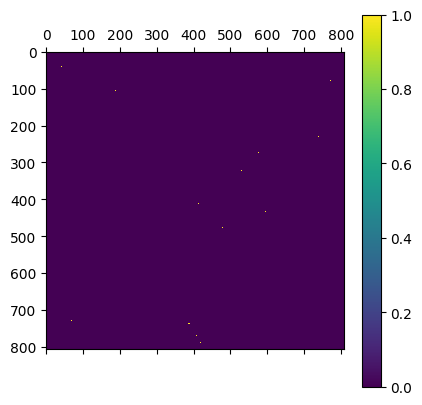

In [33]:
plt.matshow(all_trips)
plt.colorbar()
plt.show()

## Tensor Decomposition

In [34]:
!pip install tensorly

In [35]:
import tensorly as tl
from tensorly.decomposition import tucker

In [36]:
#Represent the trips as a tensor
tensor_trip = tl.tensor(trips_3darray, dtype='float64')

In [37]:
tensor_trip.shape

(808, 808, 4024)

In [38]:
# Rank of Tucker decomposition
tucker_rank = [10, 10, 15]

In [ ]:
%%time
core, factors = tucker(tensor_trip, rank=tucker_rank, init='random', tol=10e-5,random_state=12345)

In [ ]:
#Convert the tucker tensor into a full tensor
tucker_rec = tl.tucker_to_tensor((core, factors))

In [ ]:
factors[0].shape

In [ ]:
factors[1].shape

In [ ]:
factors[2].shape

In [ ]:
import requests

In [ ]:
response= requests.get('https://api.tfl.gov.uk/BikePoint/')
stations = response.json()

In [ ]:
data =  pd.DataFrame()
s_names = []
s_lat = []
s_lon = []

NbBikes = []
NbEmptyDocks = []
NbDocks = []
NbStandardBikes = []
NbEBikes = []
s_id = []

In [ ]:
len_lat = 0
for station in stations:
    s_names.append(station['commonName'])
    s_lat.append(float(station['lat']))
    s_lon.append(float(station['lon']))
    for add_property in station['additionalProperties']:
        if add_property['key'] == 'NbBikes':
            NbBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEmptyDocks':
            NbEmptyDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbDocks':
            NbDocks.append(int(add_property['value']))
        if add_property['key'] == 'NbStandardBikes':
            NbStandardBikes.append(int(add_property['value']))
        if add_property['key'] == 'NbEBikes':
            NbEBikes.append(int(add_property['value']))
        if add_property['key'] == 'TerminalName':
            s_id.append(int(add_property['value']))


In [ ]:
data['Station_name'] = s_names
data['s_lat'] = s_lat
data['s_lon'] = s_lon
data['s_num_bikes'] = NbBikes
data['s_num_empty_docks'] = NbEmptyDocks
data['s_num_std_bikes'] = NbStandardBikes
data['s_num_e-bikes'] = NbEBikes
data['s_num_docks'] = data['s_num_bikes'] + data['s_num_empty_docks']
data['s_id'] = s_id

In [ ]:
data

In [ ]:
# South East limits
se_limit_lat = 51.523811 # everthing lower than this value is south east
se_limit_lon = -0.101342 # everything greater than this value is south east

# East limits
e_limit_lat = 51.523811 # everything greater than this value is east
e_limit_lon = -0.022306 # everything greater than this is east

# South West limits
sw_limit_lat = 51.501631 # everthing lower than this value is south east
sw_limit_lon = -0.101342 # everything lower than this value is south east

# West limits
w_limit_lat = 51.501072  # everthing greater than this value is south east
w_limit_lon = -0.182406  # everthing lower than this value is south east

# Central limits
c_toplimit_lat = 51.501072 # everthing greater than this value is central
c_lowlimit_lat = 51.523811 # everything lower than this value is central

c_toplimit_lon = -0.101342 # everything lower than this value is central
c_lowlimit_lon = -0.182406 # everthing greater than this value is central

# North limits
n_toplimit_lon = -0.022306 # everything lower than this value is central
n_lowlimit_lon = -0.182406 # everthing greater than this value is central

n_lowlimit_lat = 51.523811 # everthing greater than this value is central

In [ ]:
loc = []

In [ ]:
for station in data.index:
    if data['s_lat'][station] > c_toplimit_lat and data['s_lat'][station]< c_lowlimit_lat and data['s_lon'][station]< c_toplimit_lon and data['s_lon'][station]>c_lowlimit_lon:
        loc.append(1) # Central
    elif data['s_lon'][station] < n_toplimit_lon and data['s_lon'][station] > n_lowlimit_lon and data['s_lat'][station] > n_lowlimit_lat:
        loc.append(2) # North
    elif data['s_lon'][station] < w_limit_lon and data['s_lat'][station] > w_limit_lat:
        loc.append(3) # West
    elif data['s_lon'][station] < sw_limit_lon and data['s_lat'][station] < sw_limit_lat:
        loc.append(4)  # South_West
    elif data['s_lon'][station] > e_limit_lon and data['s_lat'][station] > e_limit_lat:
        loc.append(5) # East
    elif data['s_lon'][station] > se_limit_lon and data['s_lat'][station] < se_limit_lat:
        loc.append(6) # South East
    else:
        loc.append('Other')

In [ ]:
data['Area_loc'] = loc

In [ ]:
data

In [ ]:
data.loc[data.Station_name == 'Chepstow Villas, Notting Hill'].values[0][9]

In [ ]:
color_stations = []
for station in total_uniq_stations:
  info_val = data.loc[data.Station_name == station].values
  if len(info_val)>0:
    color_stations.append(data.loc[data.Station_name == station].values[0][9])
  else:
    color_stations.append(7)

In [ ]:
len(color_stations)

In [ ]:
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[0], c=color_stations)
axs[0, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[0], c=color_stations)
axs[0, 2].plot(np.transpose(factors[2])[0])

axs[1, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[1], c=color_stations)
axs[1, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[1], c=color_stations)
axs[1, 2].plot(np.transpose(factors[2])[1])

axs[2, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[2], c=color_stations)
axs[2, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[2], c=color_stations)
axs[2, 2].plot(np.transpose(factors[2])[2])

axs[3, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[3], c=color_stations)
axs[3, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[3], c=color_stations)
axs[3, 2].plot(np.transpose(factors[2])[3])

axs[4, 0].scatter(x=range(len(factors[0])), y=np.transpose(factors[0])[4], c=color_stations)
axs[4, 1].scatter(x=range(len(factors[1])), y=np.transpose(factors[1])[4], c=color_stations)
axs[4, 2].plot(np.transpose(factors[2])[4])

In [ ]:
factors[2].shape

In [ ]:
type(factors[2])

In [ ]:
from google.colab import files

In [ ]:
# convert array into dataframe
result_df = pd.DataFrame(factors[2])

In [ ]:
result_df['timestamp'] = pd.to_datetime(total_hours)

In [ ]:
result_df.to_csv('filename.csv')
files.download('filename.csv')